# Importing Libraries

#### The first step is to import the following list of libraries:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to C:\Users\Vinayak
[nltk_data]     Mokashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vinayak Mokashi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Vinayak
[nltk_data]     Mokashi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the data

#### The data set that we will be using for this assignment is the famous “Natural Language Processing with Disaster Tweets” data set where we’ll be predicting whether a given tweet is about a real disaster (target=1) or not (target=0)

In [2]:
df = pd.read_csv("C:\\Users\\Vinayak Mokashi\\Python Sab\\SC V\\HPDM\\Assignment\\train.csv")

In [3]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## Data Description

#### id - a unique identifier for each tweet
#### text - the text of the tweet
#### location - the location the tweet was sent from (may be blank)
#### keyword - a particular keyword from the tweet (may be blank)
#### target - This denotes whether a tweet is about a real disaster (1) or not (0)


#### We have 7,613 tweets in the dataset

# Exploratory Data Analysis

In [4]:
print(df.shape)

(7613, 5)


0    4342
1    3271
Name: target, dtype: int64


C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='target'>

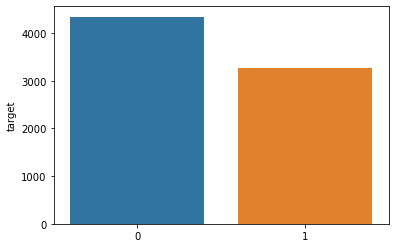

In [5]:
#1) CLASS DISTRIBUTION
#if dataset is balanced or not
x=df['target'].value_counts()
print(x)
sns.barplot(x.index,x)

### Class distribution: There are more tweets with class 0 ( no disaster) than class 1 ( disaster tweets). We can say that the dataset is relatively balanced with 4342 non-disaster tweets (57%) and 3271 disaster tweets (43%). Since the data is balanced, we won’t be applying data-balancing techniques like SMOTE while building the model

In [6]:
#WORD-COUNT
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df[df['target']==1]['word_count'].mean()) #Disaster tweets
print(df[df['target']==0]['word_count'].mean()) #Non-Disaster tweets
#Disaster tweets are more wordy than the non-disaster tweets

15.167532864567411
14.704744357438969


### The average number of words in a disaster tweet is 15.17 as compared to an average of 14.7 words in a non-disaster tweet

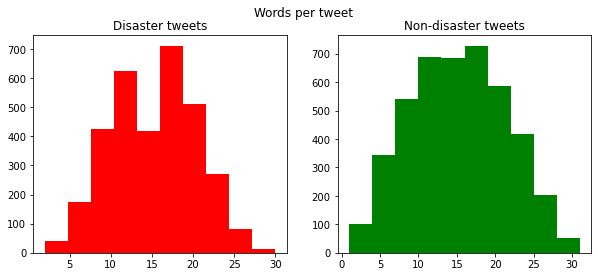

In [7]:
#Plotting word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df[df['target']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Disaster tweets')
train_words=df[df['target']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

In [8]:
#CHARACTER-COUNT
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
print(df[df['target']==1]['char_count'].mean()) #Disaster tweets
print(df[df['target']==0]['char_count'].mean()) #Non-Disaster tweets
#Disaster tweets are longer than the non-disaster tweets

108.11342097217977
95.70681713496084


### The average characters in a disaster tweet is 108.1 as compared to an average of 95.7 characters in a non-disaster tweet

In [9]:
#3. UNIQUE WORD-COUNT
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
print(df[df['target']==1]['unique_word_count'].mean()) #Disaster tweets
print(df[df['target']==0]['unique_word_count'].mean()) #Non-Disaster tweets

14.664934270865178
14.09649930907416


### The average unique words in a disaster tweet is 14.66 as compared to an average of 14.09  in a non-disaster tweet

# Data Preprocessing - Text Preprocessing

### Before we move to model building, we need to preprocess our dataset by removing punctuations & special characters, cleaning texts, removing stop words, and applying lemmatization

### Some of the common text cleaning process used here are:
#### Removing punctuations, special characters, URLs & hashtags
#### Removing leading, trailing & extra white spaces/tabs
#### Typos, slangs are corrected, abbreviations are written in their long forms
#### Stop-word removal: We can remove a list of generic stop words from the English vocabulary using nltk. A few such words are ‘i’,’you’,’a’,’the’,’he’,’which’ etc.
#### Stemming: Refers to the process of slicing the end or the beginning of words with the intention of removing affixes(prefix/suffix)
#### Lemmatization: It is the process of reducing the word to its base form

In [10]:
#Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [11]:
#LEXICON-BASED TEXT PROCESSING

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

message cleaned may involve things like adjacent spaces tabs


In [12]:
#STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

messag clean may involv thing like adjac space tab


In [14]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

messag clean may involv thing like adjac space tab


In [15]:
#FINAL PREPROCESSING - Our data:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df['clean_text'] = df['text'].apply(lambda x: finalpreprocess(x))
df=df.drop(columns=['word_count','char_count','unique_word_count'])
df.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...


# Feature Engineering:

## Extracting vectors from text (Vectorization):

#### It’s difficult to work with text data while building Machine learning models since these models need well-defined numerical data. The process to convert text data into numerical data/vector, is called vectorization or in the NLP world, word embedding. Bag-of-Words(BoW) and Word Embedding (with Word2Vec) are two well-known methods for converting text data to numerical data.

#### There are a few versions of Bag of Words, corresponding to different words scoring methods. We use the Sklearn library to calculate the BoW numerical values using these approaches:

#### 1) Count vectors: It builds a vocabulary from a corpus of documents and counts how many times the words appear in each document

#### 2)Term Frequency-Inverse Document Frequencies (tf-Idf): Count vectors might not be the best representation for converting text data to numerical data. So, instead of simple counting, we can also use an advanced variant of the Bag-of-Words that uses the term frequency–inverse document frequency (or Tf-Idf). Basically, the value of a word increases proportionally to count in the document, but it is inversely proportional to the frequency of the word in the corpus

#### Word2Vec: One of the major drawbacks of using Bag-of-words techniques is that it can’t capture the meaning or relation of the words from vectors. Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network which is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

#### We can use any of these approaches to convert our text data to numerical form which will be used to build the classification model.

In [16]:
#Creating a Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']] #convert preprocessed sentence to tokenized sentence
df

,id,keyword,location,text,target,clean_text,clean_text_tok
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[resident, ask, shelter, place, notify, office..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby ho...,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria ahrary thetawniest control wild fire cali...,"[aria, ahrary, thetawniest, control, wild, fir..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utc km volcano hawaii http co zdtoyd ebj,"[utc, km, volcano, hawaii, http, co, zdtoyd, ebj]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate e bike collide car little p...,"[police, investigate, e, bike, collide, car, l..."


In [17]:
model = Word2Vec(df['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) #for converting sentence to vectors/numbers from word vectors result by Word2Vec

In [18]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

#### Build model using Train and test Split: We partition the dataset into training set (80%) and test set (20%) using the below-mentioned code

In [19]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND TESTING
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df["clean_text"],
                                                  df["target"],
                                                  test_size=0.2,
                                                  random_state=45)

In [22]:
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec
print(X_train_tok)
print(X_val_tok)

[['newberg', 'upheaval', 'jacque', 'betz', 'respond', 'look', 'forward', 'day', 'answer', 'question', 'orcot', 'orpol', 'http', 'co', 'dazqamoo', 'c'], ['come', 'land', 'engulfed', 'tribal', 'war', 'turn', 'land', 'peace', 'e', 'madinah', 'prophetmuhammad', 'islam'], ['air', 'sunray', 'obliterate', 'hairy', 'head', 'like', 'dried', 'wire', 'spiderweb'], ['uk', 'deluge', 'canadian', 'theme', 'top', 'around', 'time', 'perfect', 'quite', 'believe', 'mad'], ['famine', 'come', 'end', 'bluebell', 'http', 'co', 'p', 'rymfjcux'], ['late', 'home', 'raze', 'northerncalifornia', 'wildfire', 'http', 'co', 'monijjth', 'v', 'zippednews', 'http', 'co', 'yxbb', 'dzw'], ['asbury', 'park', 'shoot', 'report', 'http', 'co', 'dadz', 'zfo', 'g', 'via', 'asburyparkpress'], ['interest', 'approach', 'replace', 'eyewitness', 'video', 'ferguson', 'case', 'video', 'http', 'co', 'vecsosrler', 'http', 'co', 'fiuogj', 'hef'], ['mh', 'aircraft', 'debris', 'find', 'la', 'reunion', 'miss', 'malaysia', 'airline', 'http'

In [23]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

In [24]:
#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

#### It’s time to train a machine learning model on the vectorized dataset and test it. Now that we have converted the text data to numerical data, we can run ML models on X_train_vector_tfidf & y_train. We’ll test this model on X_test_vectors_tfidf to get y_predict and further evaluate the performance of the model


#### 1) Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
#### The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

### Fitting a regular SVM model on the processed data (tf-idf):

In [25]:
#FITTING THE CLASSIFICATION MODEL using SVM (tf-idf):

svm_tfidf = SVC(probability=True,kernel = "linear")
svm_tfidf.fit(X_train_vectors_tfidf, y_train) #model


predicted_svm_tfidf = svm_tfidf.predict(X_val_vectors_tfidf)
accuracy_svm_tfidf = svm_tfidf.score(X_val_vectors_tfidf, y_val)

print("Accuracy:", accuracy_svm_tfidf)
print(classification_report(y_val,predicted_svm_tfidf))
print('Confusion Matrix:',confusion_matrix(y_val, predicted_svm_tfidf))

#Tried using all the kernels, linear kernel gives the highest accuracy (We rely on accuracy as our data is approximately balanced)

Accuracy: 0.8017071569271176
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       876
           1       0.79      0.73      0.76       647

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523

Confusion Matrix: [[748 128]
 [174 473]]


### Bagging with base learners as SVM (tf-idf):

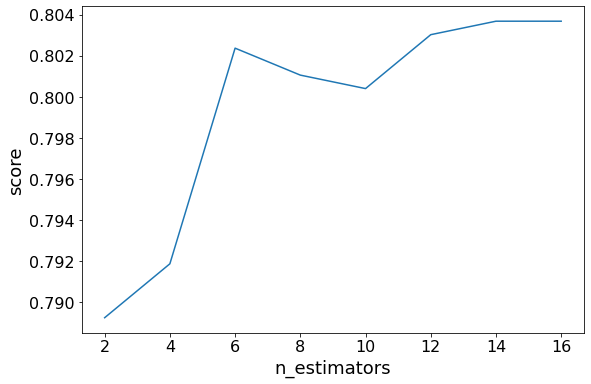

In [173]:
#FITTING THE CLASSIFICATION MODEL using SVM (Bagging) (tf-idf):

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf_bagging_svm_tfidf = BaggingClassifier(base_estimator=svm_tfidf,n_estimators = n_estimators)

    # Fit the model
    clf_bagging_svm_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_bagging_svm_tfidf)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_bagging_svm_tfidf.predict(X_val_vectors_tfidf)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 16, hence we train the model with this parameter and see its performance

In [26]:
#Best model using Bagging(SVM) (nestimators=16)(tf-idf):

#Creating bagging model
clf_bagging_svm_tfidf_bagging = BaggingClassifier(base_estimator=svm_tfidf,n_estimators = 16)

# Fit the model
clf_bagging_svm_tfidf_bagging.fit(X_train_vectors_tfidf, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_bagging_svm_tfidf_bagging.predict(X_val_vectors_tfidf)))
print(classification_report(y_val,clf_bagging_svm_tfidf_bagging.predict(X_val_vectors_tfidf)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_bagging_svm_tfidf_bagging.predict(X_val_vectors_tfidf)))


Accuracy is: 0.8010505581089954
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       876
           1       0.78      0.74      0.76       647

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523

Confusion Matrix: [[740 136]
 [167 480]]


### Boosting with base learners as SVM (tf-idf): (ADABOOST)

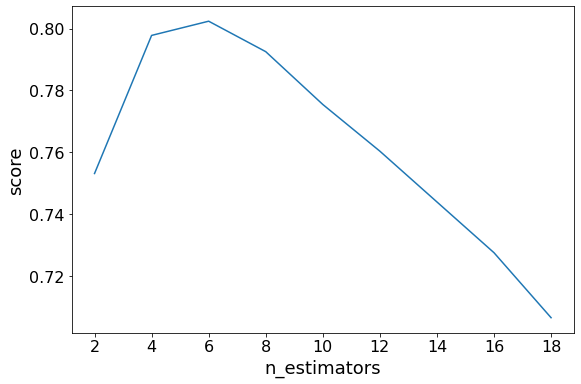

In [172]:
#FITTING THE CLASSIFICATION MODEL using SVM (Boosting) (tf-idf): (ADABOOST)

estimator_range = [2,4,6,8,10,12,14,16,18]

models = []
scores = []

for n_estimators in estimator_range:

    # Create boosting classifier
    clf_adaboosting_svm_tfidf = AdaBoostClassifier(base_estimator=svm_tfidf,n_estimators=n_estimators)

    # Fit the model
    clf_adaboosting_svm_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_adaboosting_svm_tfidf)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_adaboosting_svm_tfidf.predict(X_val_vectors_tfidf)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 6, hence we train the model with this parameter and see its performance

In [175]:
#Best model using Boosting(SVM) (nestimators=6)(tf-idf):

#Creating boosting model
clf_adaboosting_svm_tfidf = AdaBoostClassifier(base_estimator=svm_tfidf,n_estimators = 6)
# Fit the model
clf_adaboosting_svm_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_adaboosting_svm_tfidf.predict(X_val_vectors_tfidf)))
print(classification_report(y_val,clf_adaboosting_svm_tfidf.predict(X_val_vectors_tfidf)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_adaboosting_svm_tfidf.predict(X_val_vectors_tfidf)))

Accuracy is: 0.799080761654629
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       876
           1       0.82      0.68      0.74       647

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

Confusion Matrix: [[777  99]
 [207 440]]


### Now we perform k-fold cross validation with k=5,10 using SVM and see the models performance where the data is processed using tf-idf

#### Cross validation with k = 5

In [31]:
#FITTING THE CLASSIFICATION MODEL using SVM (k fold cross validation) (tf-idf):

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state = 45 , shuffle=True) #k=5
# create model
model = SVC(probability=True,kernel = "linear")

#TF-IDF
tfidf_vectorizer_kfold = TfidfVectorizer(use_idf=True)
X_vectors_tfidf_kfold = tfidf_vectorizer_kfold.fit_transform(df["clean_text"]) 

# evaluate model
scores = cross_val_score(model,X_vectors_tfidf_kfold ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))



Accuracy: 0.801 (0.009)


#### Cross validation with k = 10

In [32]:
#FITTING THE CLASSIFICATION MODEL using SVM (k fold cross validation) (tf-idf):

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state = 45 , shuffle=True) #k=10
# create model
model = SVC(probability=True,kernel = "linear")

#TF-IDF
tfidf_vectorizer_kfold = TfidfVectorizer(use_idf=True)
X_vectors_tfidf_kfold = tfidf_vectorizer_kfold.fit_transform(df["clean_text"]) 

# evaluate model
scores = cross_val_score(model,X_vectors_tfidf_kfold ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.803 (0.017)


#### 2) Naive Bayes: It's a probabilistic classifier that makes use of Bayes Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.



### Fitting a regular Naive Bayes model on the processed data (tf-idf):

In [33]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 
print("Accuracy is:",accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))


Accuracy is: 0.8030203545633617
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       876
           1       0.84      0.66      0.74       647

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Confusion Matrix: [[797  79]
 [221 426]]


### Bagging with base learners as Naive Bayes (tf-idf):

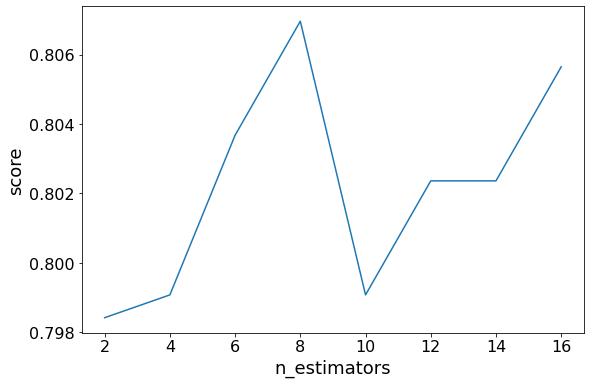

In [38]:
#FITTING THE CLASSIFICATION MODEL using Naives Bayes (Bagging) (tf-idf):

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf_bagging_nb_tfidf = BaggingClassifier(base_estimator=nb_tfidf,n_estimators = n_estimators)
    # Fit the model
    clf_bagging_nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_bagging_nb_tfidf)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_bagging_nb_tfidf.predict(X_val_vectors_tfidf)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 8, hence we train the model with this parameter and see its performance

In [39]:
#Best model using Bagging(Naive Bayes) (nestimators=8)(tf-idf):

#Creating bagging model
clf_bagging_nb_tfidf_bagging = BaggingClassifier(base_estimator=nb_tfidf,n_estimators = 8)

# Fit the model
clf_bagging_nb_tfidf_bagging.fit(X_train_vectors_tfidf, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_bagging_nb_tfidf_bagging.predict(X_val_vectors_tfidf)))
print(classification_report(y_val,clf_bagging_nb_tfidf_bagging.predict(X_val_vectors_tfidf)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_bagging_nb_tfidf_bagging.predict(X_val_vectors_tfidf)))


Accuracy is: 0.8003939592908733
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       876
           1       0.84      0.65      0.74       647

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523

Confusion Matrix: [[796  80]
 [224 423]]


### Boosting with base learners as Naive Bayes (tf-idf):

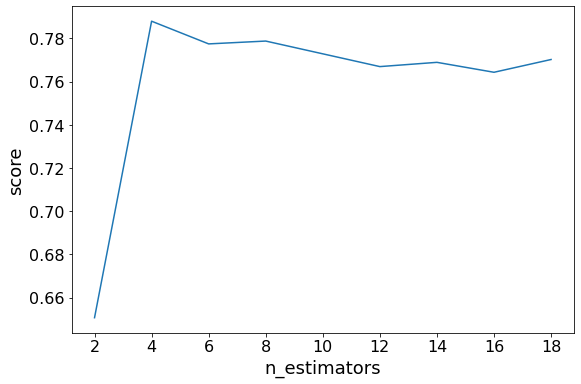

In [45]:
#FITTING THE CLASSIFICATION MODEL using Naives Bayes (Boosting) (tf-idf): (ADABOOST)

estimator_range = [2,4,6,8,10,12,14,16,18]

models = []
scores = []

for n_estimators in estimator_range:

    # Create boosting classifier
    clf_adaboosting_nb_tfidf = AdaBoostClassifier(base_estimator=nb_tfidf,n_estimators=n_estimators,algorithm = 'SAMME')

    # Fit the model
    clf_adaboosting_nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_adaboosting_nb_tfidf)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_adaboosting_nb_tfidf.predict(X_val_vectors_tfidf)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 4, hence we train the model with this parameter and see its performance

In [46]:
#Best model using Boosting(Naives Bayes) (nestimators=4)(tf-idf):

#Creating boosting model
clf_adaboosting_nb_tfidf = AdaBoostClassifier(base_estimator=nb_tfidf,n_estimators = 4,algorithm = 'SAMME')
# Fit the model
clf_adaboosting_nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_adaboosting_nb_tfidf.predict(X_val_vectors_tfidf)))
print(classification_report(y_val,clf_adaboosting_nb_tfidf.predict(X_val_vectors_tfidf)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_adaboosting_nb_tfidf.predict(X_val_vectors_tfidf)))

Accuracy is: 0.7879185817465528
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       876
           1       0.76      0.74      0.75       647

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Confusion Matrix: [[722 154]
 [169 478]]


### Now we perform k-fold cross validation with k=5,10 using Naive Bayes and see the models performance where the data is processed using tf-idf

#### Cross Validation with k = 5

In [47]:
#FITTING THE CLASSIFICATION MODEL using Naives Bayes (k fold cross validation) (tf-idf):

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state = 45 , shuffle=True) #k=5
# create model
model = MultinomialNB()

#TF-IDF
tfidf_vectorizer_kfold_nb = TfidfVectorizer(use_idf=True)
X_vectors_tfidf_kfold_nb = tfidf_vectorizer_kfold_nb.fit_transform(df["clean_text"]) 

# evaluate model
scores = cross_val_score(model,X_vectors_tfidf_kfold_nb ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.799 (0.010)


#### Cross Validation with k = 10

In [49]:
#FITTING THE CLASSIFICATION MODEL using Naives Bayes (k fold cross validation) (tf-idf):

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state = 45 , shuffle=True) #k=10
# create model
model = MultinomialNB()

#TF-IDF
tfidf_vectorizer_kfold_nb = TfidfVectorizer(use_idf=True)
X_vectors_tfidf_kfold_nb = tfidf_vectorizer_kfold_nb.fit_transform(df["clean_text"]) 

# evaluate model
scores = cross_val_score(model,X_vectors_tfidf_kfold_nb ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.802 (0.019)


### Fitting a regular SVM model on the processed data (W2v):


In [51]:
#FITTING THE CLASSIFICATION MODEL using SVM (W2v)
svm_w2v = SVC(probability=True,kernel = "linear")
svm_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = svm_w2v.predict(X_val_vectors_w2v)

print("Accuracy:", accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

#Tried using all the kernels, linear kernel gives the highest accuracy (We rely on accuracy as our data is approximately balanced)

Accuracy: 0.6119500984898227
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       876
           1       0.55      0.52      0.53       647

    accuracy                           0.61      1523
   macro avg       0.60      0.60      0.60      1523
weighted avg       0.61      0.61      0.61      1523

Confusion Matrix: [[596 280]
 [311 336]]


### Bagging with base learners as SVM (W2v):

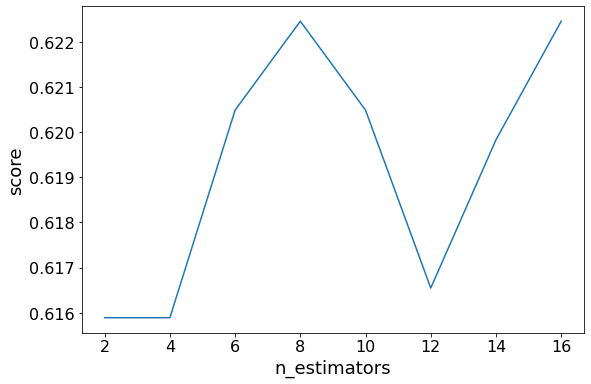

In [52]:
#FITTING THE CLASSIFICATION MODEL using SVM (Bagging) (W2v):

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf_bagging_svm_w2v = BaggingClassifier(base_estimator=svm_w2v ,n_estimators = n_estimators)

    # Fit the model
    clf_bagging_svm_w2v.fit(X_train_vectors_w2v, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_bagging_svm_w2v)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_bagging_svm_w2v.predict(X_val_vectors_w2v)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 8, hence we train the model with this parameter and see its performance

In [53]:
#Best model using Bagging (SVM) (nestimators=8)(W2v):

#Creating bagging model
clf_bagging_svm_w2v = BaggingClassifier(base_estimator=svm_w2v ,n_estimators = 8)

# Fit the model
clf_bagging_svm_w2v.fit(X_train_vectors_w2v, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_bagging_svm_w2v.predict(X_val_vectors_w2v)))
print(classification_report(y_val,clf_bagging_svm_w2v.predict(X_val_vectors_w2v)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_bagging_svm_w2v.predict(X_val_vectors_w2v)))


Accuracy is: 0.6198292843072882
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       876
           1       0.57      0.45      0.50       647

    accuracy                           0.62      1523
   macro avg       0.61      0.60      0.60      1523
weighted avg       0.61      0.62      0.61      1523

Confusion Matrix: [[653 223]
 [356 291]]


### Boosting with base learners as SVM (W2v): (ADABOOST)


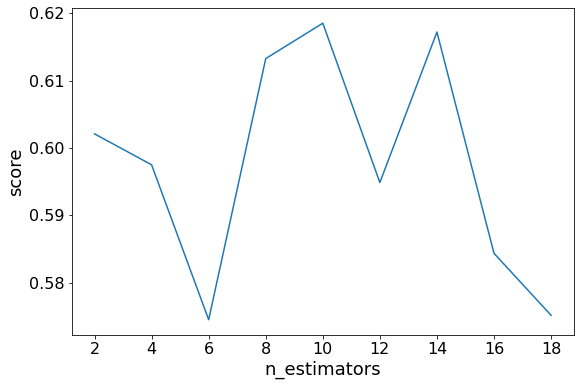

In [54]:
#FITTING THE CLASSIFICATION MODEL using SVM (Boosting) (W2v): (ADABOOST)

estimator_range = [2,4,6,8,10,12,14,16,18]

models = []
scores = []

for n_estimators in estimator_range:

    # Create boosting classifier
    clf_adaboosting_svm_w2v = AdaBoostClassifier(base_estimator=svm_w2v ,n_estimators=n_estimators)

    # Fit the model
    clf_adaboosting_svm_w2v.fit(X_train_vectors_w2v, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_adaboosting_svm_w2v)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_adaboosting_svm_w2v.predict(X_val_vectors_w2v)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 10, hence we train the model with this parameter and see its performance

In [55]:
#Best model using Boosting(SVM) (nestimators=10 )(W2v):

#Creating boosting model
clf_adaboosting_svm_w2v = AdaBoostClassifier(base_estimator=svm_w2v,n_estimators = 10 )
# Fit the model
clf_adaboosting_svm_w2v.fit(X_train_vectors_w2v, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_adaboosting_svm_w2v.predict(X_val_vectors_w2v)))
print(classification_report(y_val,clf_adaboosting_svm_w2v.predict(X_val_vectors_w2v)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_adaboosting_svm_w2v.predict(X_val_vectors_w2v)))

Accuracy is: 0.5751805646749836


C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.73       876
           1       0.00      0.00      0.00       647

    accuracy                           0.58      1523
   macro avg       0.29      0.50      0.37      1523
weighted avg       0.33      0.58      0.42      1523

Confusion Matrix: [[876   0]
 [647   0]]


### Now we perform k-fold cross validation with k=5,10 using SVM and see the models performance where the data is processed using W2v

#### k-fold cross Validation with k = 5

In [59]:
#FITTING THE CLASSIFICATION MODEL using SVM (k fold cross validation) (W2v):

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state = 45 , shuffle=True) #k=5
# create model
model = SVC(probability=True,kernel = "linear")

#W2v
X_tok_w2v= [nltk.word_tokenize(i) for i in df['clean_text']]  #for word2vec
modelw = MeanEmbeddingVectorizer(w2v)
X_vectors_w2v = modelw.transform(X_tok_w2v)

# evaluate model
scores = cross_val_score(model,X_vectors_w2v ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.618 (0.006)


#### k-fold cross Validation with k = 10

In [60]:
#FITTING THE CLASSIFICATION MODEL using SVM (k fold cross validation) (W2v):

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state = 45 , shuffle=True) #k=10
# create model
model = SVC(probability=True,kernel = "linear")

#W2v
X_tok_w2v= [nltk.word_tokenize(i) for i in df['clean_text']]  #for word2vec
modelw = MeanEmbeddingVectorizer(w2v)
X_vectors_w2v = modelw.transform(X_tok_w2v)

# evaluate model
scores = cross_val_score(model,X_vectors_w2v ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.621 (0.010)


### Fitting a regular Naive Bayes model on the processed data (W2v):


In [65]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(W2v)

nb_w2v = GaussianNB()
nb_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = nb_w2v.predict(X_val_vectors_w2v)
y_prob = nb_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 
print("Accuracy is:",accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))


Accuracy is: 0.6021011162179908
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       876
           1       0.52      0.72      0.60       647

    accuracy                           0.60      1523
   macro avg       0.62      0.62      0.60      1523
weighted avg       0.63      0.60      0.60      1523

Confusion Matrix: [[454 422]
 [184 463]]


### Bagging with base learners as Naive Bayes (W2v):

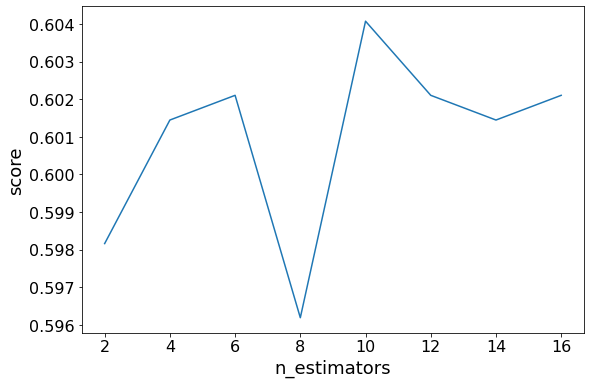

In [66]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes (Bagging) (W2v):

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf_bagging_nb_w2v = BaggingClassifier(base_estimator=nb_w2v ,n_estimators = n_estimators)

    # Fit the model
    clf_bagging_nb_w2v.fit(X_train_vectors_w2v, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_bagging_nb_w2v)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_bagging_nb_w2v.predict(X_val_vectors_w2v)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 10, hence we train the model with this parameter and see its performance

In [67]:
#Best model using Bagging (Naive Bayes) (nestimators=10)(W2v):

#Creating bagging model
clf_bagging_nb_w2v = BaggingClassifier(base_estimator=nb_w2v ,n_estimators = 10)

# Fit the model
clf_bagging_nb_w2v.fit(X_train_vectors_w2v, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_bagging_nb_w2v.predict(X_val_vectors_w2v)))
print(classification_report(y_val,clf_bagging_nb_w2v.predict(X_val_vectors_w2v)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_bagging_nb_w2v.predict(X_val_vectors_w2v)))


Accuracy is: 0.6040709126723572
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       876
           1       0.53      0.71      0.60       647

    accuracy                           0.60      1523
   macro avg       0.62      0.62      0.60      1523
weighted avg       0.63      0.60      0.60      1523

Confusion Matrix: [[459 417]
 [186 461]]


### Boosting with base learners as Naive Bayes (W2v):

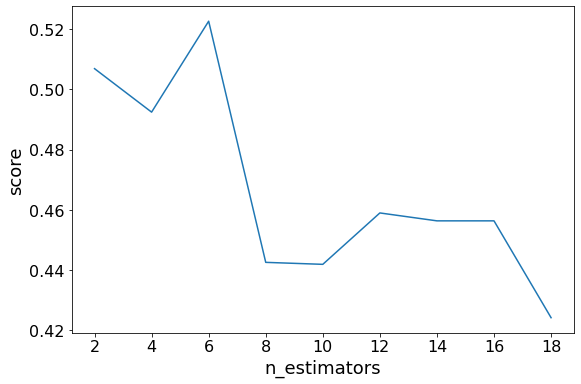

In [68]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes (Boosting) (W2v): (ADABOOST)

estimator_range = [2,4,6,8,10,12,14,16,18]

models = []
scores = []

for n_estimators in estimator_range:

    # Create boosting classifier
    clf_adaboosting_nb_w2v = AdaBoostClassifier(base_estimator=nb_w2v ,n_estimators=n_estimators)

    # Fit the model
    clf_adaboosting_nb_w2v.fit(X_train_vectors_w2v, y_train)  #model

    # Append the model and score to their respective list
    models.append(clf_adaboosting_nb_w2v)
    scores.append(accuracy_score(y_true = y_val, y_pred = clf_adaboosting_nb_w2v.predict(X_val_vectors_w2v)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#### Best model accuracy is obtained when n_estimators = 6, hence we train the model with this parameter and see its performance

In [72]:
#Best model using Boosting(Naive Bayes) (nestimators=6)(W2v):

#Creating boosting model
clf_adaboosting_nb_w2v = AdaBoostClassifier(base_estimator=nb_w2v,n_estimators = 6)
# Fit the model
clf_adaboosting_nb_w2v.fit(X_train_vectors_w2v, y_train)  #model

print("Accuracy is:",accuracy_score(y_true = y_val, y_pred = clf_adaboosting_nb_w2v.predict(X_val_vectors_w2v)))
print(classification_report(y_val,clf_adaboosting_nb_w2v.predict(X_val_vectors_w2v)))
print('Confusion Matrix:',confusion_matrix(y_val, clf_adaboosting_nb_w2v.predict(X_val_vectors_w2v)))

Accuracy is: 0.5226526592252134
              precision    recall  f1-score   support

           0       0.56      0.85      0.67       876
           1       0.28      0.08      0.12       647

    accuracy                           0.52      1523
   macro avg       0.42      0.46      0.40      1523
weighted avg       0.44      0.52      0.44      1523

Confusion Matrix: [[746 130]
 [597  50]]


### Now we perform k-fold cross validation with k=5,10 using Naive Bayes and see the models performance where the data is processed using W2v

#### k-fold cross Validation with k = 5

In [73]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes (k fold cross validation) (W2v):

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state = 45 , shuffle=True) #k=5
# create model
model = GaussianNB()

#W2v
X_tok_w2v_nb = [nltk.word_tokenize(i) for i in df['clean_text']]  #for word2vec
modelw = MeanEmbeddingVectorizer(w2v)
X_vectors_w2v_nb = modelw.transform(X_tok_w2v_nb)

# evaluate model
scores = cross_val_score(model,X_vectors_w2v_nb ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.590 (0.010)


#### k-fold cross Validation with k = 10

In [74]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes (k fold cross validation) (W2v):

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state = 45 , shuffle=True) #k=10
# create model
model = GaussianNB()

#W2v
X_tok_w2v_nb = [nltk.word_tokenize(i) for i in df['clean_text']]  #for word2vec
modelw = MeanEmbeddingVectorizer(w2v)
X_vectors_w2v_nb = modelw.transform(X_tok_w2v_nb)

# evaluate model
scores = cross_val_score(model,X_vectors_w2v_nb ,df['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.590 (0.012)


# CONCLUSION: 
#### Both the algorithms - SVM & Naive Bayes work better when we used BoW rather than W2v for converting text to vectors - This is because of dataset is small and most of the times when this happens, BoW works better than word embeddings like W2v.

#### SVM and Naive Bayes almost gave the same accuracy when trained regularly, hence we go with Naive Bayes since the computational time decreases significantly, it is very fast and can classify large chunks of data very quickly. It can also work well if we have lesser training data.

#### In this case, Bagging and boosting could not increase the accuracy of the model with both the models - SVM and Naive Bayes, hence it is pointless to go with any of these models since it will only increase the load of computation.
#### Also accuracy also remained the same when we used k-fold Cross Validation which points that our model is stable
#### Hence regular Naive Bayes model should be used with TF-IDF vectorization.